In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

path = './test_data/'
filename = '600000.csv'

In [2]:
# 从csv读取数据, 加入head行, 去掉最后一行“通达信”
stk = pd.read_csv(path+filename, names=['date', 'open', 'high', 'low', 'close', 'amount', 'volume'], parse_dates=True)
stk = stk.drop(stk.index[-1])

In [3]:
# 计算涨幅
stk['rise'] = stk['close'] / stk['close'].shift(1) - 1

In [4]:
# 剔除涨幅超过+-%10.1的数据
index_names = stk[ (stk['rise'] > 0.101) & (stk['rise'] < -0.101)].index 
stk.drop(index_names, inplace = True) 
stk

,date,open,high,low,close,amount,volume,rise
0,20200220,10.57,10.67,10.46,10.63,36656416.0,4.089381e+08,NaN
1,20200221,10.63,10.79,10.61,10.70,38949418.0,4.397070e+08,0.006585
2,20200224,10.63,10.74,10.50,10.56,44738622.0,5.011860e+08,-0.013084
3,20200225,10.47,10.55,10.41,10.49,48324564.0,5.352418e+08,-0.006629
4,20200226,10.41,10.73,10.41,10.60,51906287.0,5.814378e+08,0.010486
...,...,...,...,...,...,...,...,...
249,20210301,10.59,10.64,10.50,10.58,54746126.0,5.784915e+08,0.003795
250,20210302,10.61,10.70,10.36,10.47,74763149.0,7.866167e+08,-0.010397
251,20210303,10.45,10.92,10.43,10.92,113570860.0,1.224388e+09,0.042980
252,20210304,10.80,10.92,10.76,10.88,75412865.0,8.178172e+08,-0.003663


In [5]:
# 可以只保留日期,收盘价,涨幅用于构建神经网络
cols_to_keep = ['date','close','rise']
stk = stk[cols_to_keep]

<IPython.core.display.Javascript object>


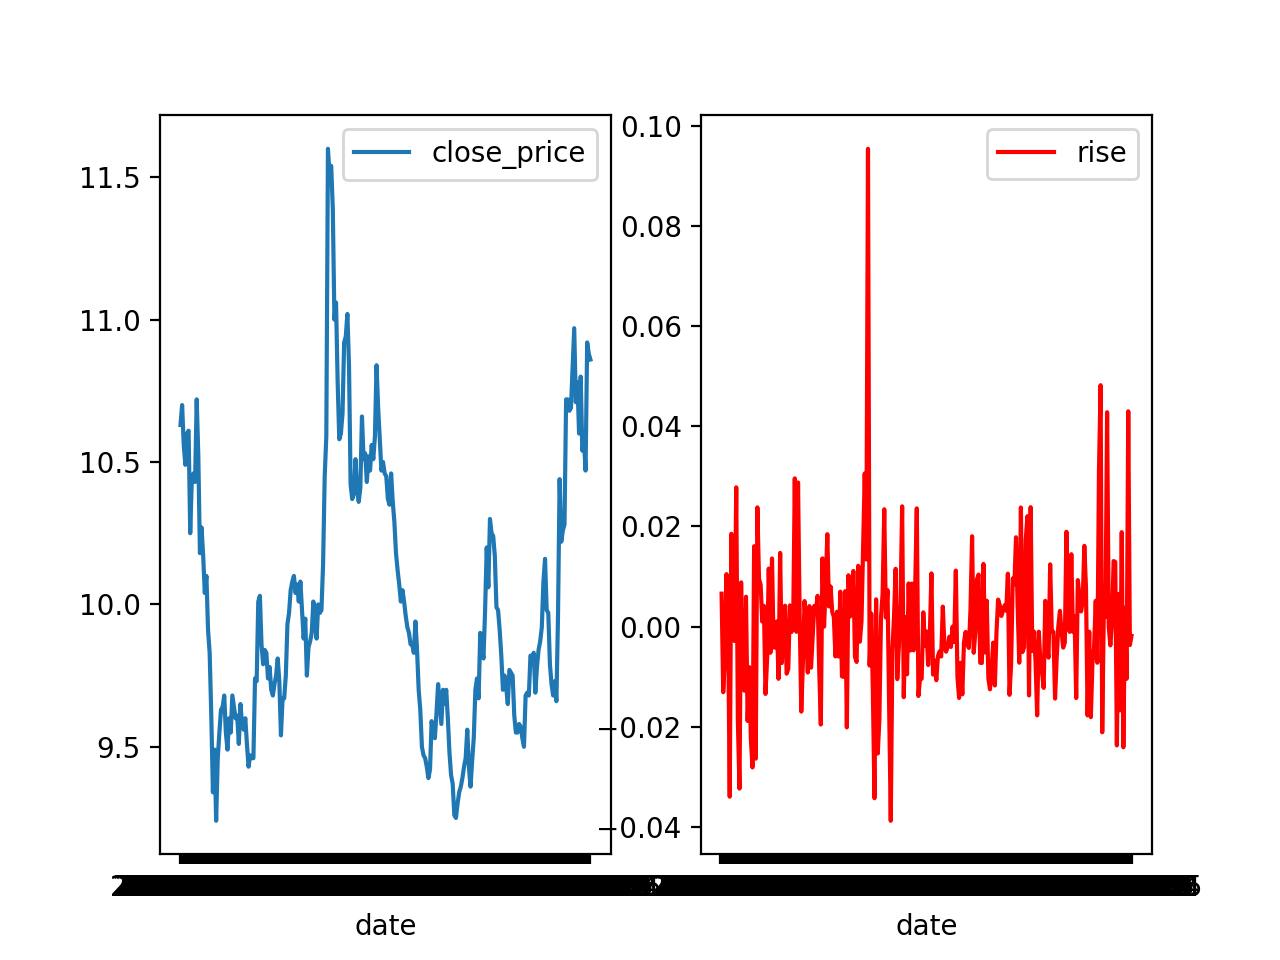

In [6]:
# 收盘价和涨幅图像
plt.subplot(1,2,1)
plt.plot(stk['date'], stk['close'], label='close_price')
plt.xlabel('date')
plt.legend()
plt.subplot(1,2,2)
plt.plot(stk['date'], stk['rise'], color='red', label='rise')
plt.xlabel('date')
plt.legend()

plt.show()

In [7]:
stk = stk.set_index('date')
stk.to_csv(path+'cleaned'+filename)